In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\Credit_score.csv', low_memory =False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [7]:
df.shape

(100000, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.isnull().sum()


ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

In [15]:

# Handle non-numeric entries in 'Num_Credit_Inquiries'
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')
median_value = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_value, inplace=True)

# Repeat the process for other columns if needed
num_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Amount_invested_monthly', 'Monthly_Balance']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# For categorical columns, fill missing values with mode
cat_cols = ['Name', 'Type_of_Loan', 'Credit_History_Age']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify there are no more missing values
missing_values_after_cleaning = df.isnull().sum()
missing_columns_after_cleaning = missing_values_after_cleaning[missing_values_after_cleaning > 0]
print(missing_columns_after_cleaning)



Series([], dtype: int64)


In [22]:
df.to_csv('C:\\Users\\Dell\\Downloads\\Credit_score.csv',index = False)

In [23]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

# Exploratory Data Analysis (EDA):

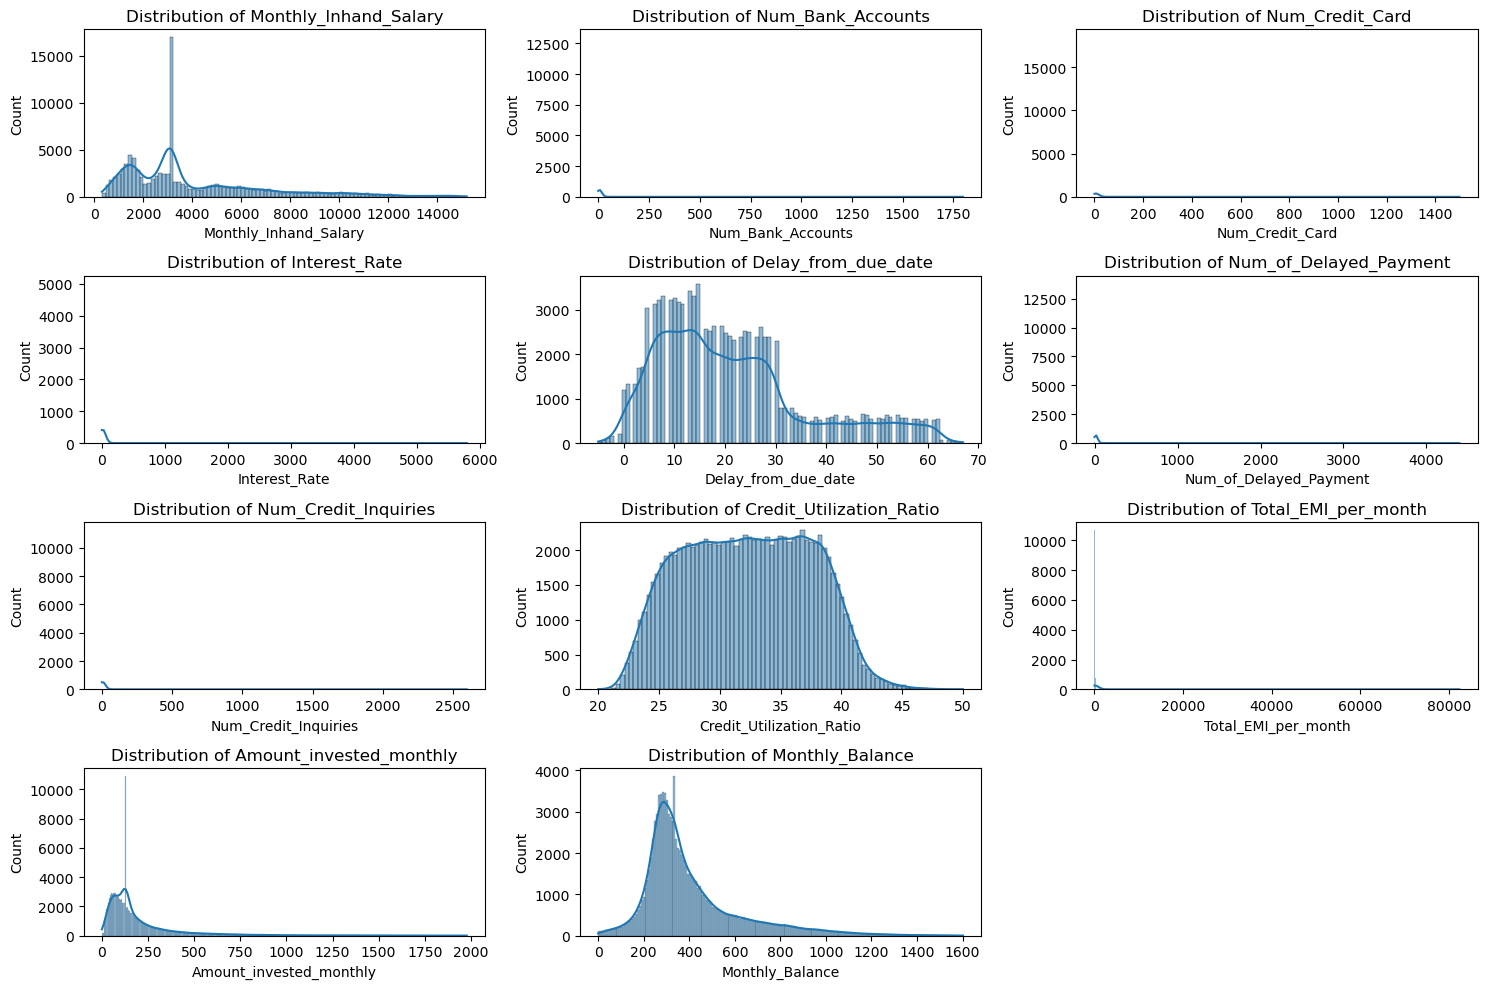

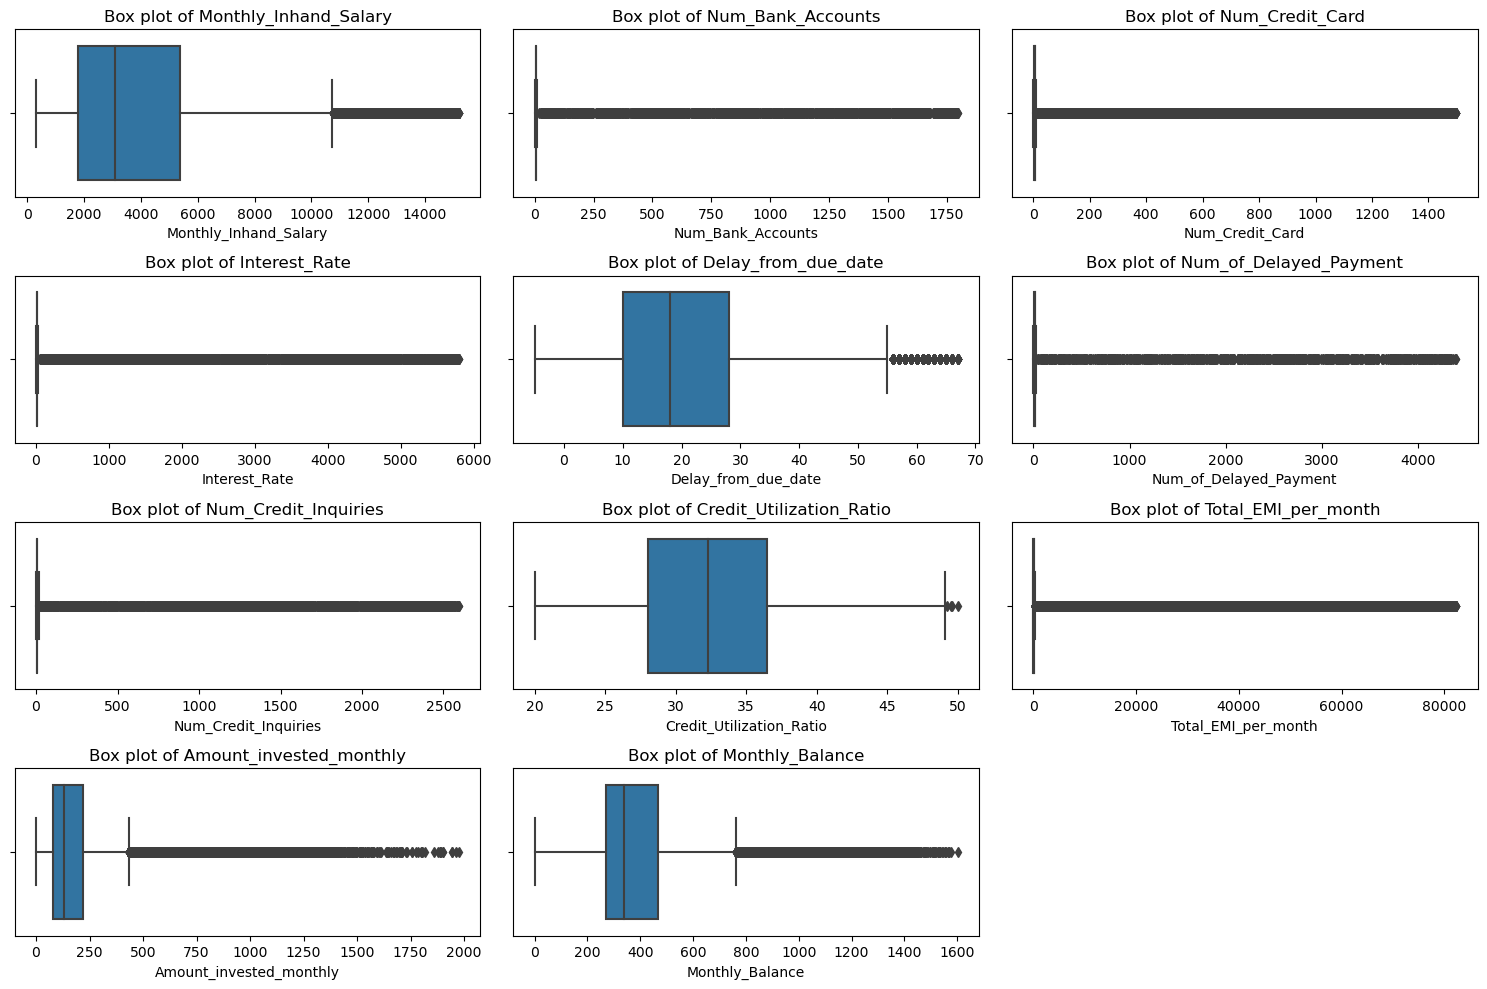

In [24]:
# Plot histograms and box plots for numerical features
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [25]:
from scipy import stats

# Z-score method to detect outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers
threshold = 3
outliers = np.where(z_scores > threshold)

# Print outliers
print("Outliers detected at indices:", outliers[0])

# Remove outliers
credit_data_cleaned = df[(z_scores < threshold).all(axis=1)]

Outliers detected at indices: [   10    16    19 ... 99970 99993 99997]


In [37]:
# Convert relevant columns to numeric, forcing errors to NaN
columns_to_convert = [
    'Outstanding_Debt',
    'Annual_Income',
    'Num_Credit_Card',
    'Num_Bank_Accounts',
    'Total_EMI_per_month',
    'Num_of_Delayed_Payment',
    'Num_of_Loan',
    'Monthly_Inhand_Salary',
    'Changed_Credit_Limit'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle missing values for required columns
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].median())
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median())
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(df['Total_EMI_per_month'].median())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

# Feature Engineering
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']
df['Credit_Card_Utilization'] = df['Num_Credit_Card'] / df['Num_Bank_Accounts']
df['Average_Monthly_EMI'] = df['Total_EMI_per_month'] / 12
df['Delayed_Payment_Ratio'] = df['Num_of_Delayed_Payment'] / df['Num_of_Loan']
df['Income_Stability'] = df['Monthly_Inhand_Salary'] / (df['Annual_Income'] / 12)
df['Credit_Limit_Change_Impact'] = df['Changed_Credit_Limit'] / df['Outstanding_Debt']

# Select relevant features
features = [
    'Debt_to_Income_Ratio',
    'Credit_Card_Utilization',
    'Average_Monthly_EMI',
    'Delayed_Payment_Ratio',
    'Income_Stability',
    'Credit_Limit_Change_Impact'
]

# Normalize features
for feature in features:
    df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

# Assign weights to features (weights must sum to 1)
weights = {
    'Debt_to_Income_Ratio': 0.2,
    'Credit_Card_Utilization': 0.15,
    'Average_Monthly_EMI': 0.1,
    'Delayed_Payment_Ratio': 0.25,
    'Income_Stability': 0.2,
    'Credit_Limit_Change_Impact': 0.1
}

# Calculate credit score
df['Credit_Score'] = sum(df[feature] * weight for feature, weight in weights.items())

# Display the first few rows of the dataset with the credit score
print(df[['Customer_ID', 'Credit_Score']].head(10))

  Customer_ID  Credit_Score
0   CUS_0xd40           NaN
1   CUS_0xd40           NaN
2   CUS_0xd40           NaN
3   CUS_0xd40           NaN
4   CUS_0xd40           NaN
5   CUS_0xd40           NaN
6   CUS_0xd40           NaN
7   CUS_0xd40           NaN
8  CUS_0x21b1           NaN
9  CUS_0x21b1           NaN


# Analysis and Insights

1. EDA Insights

**Distribution of Features:**

- Annual Income: The distribution of annual income is right-skewed, with a few high-income customers.
- Outstanding Debt: This feature also shows a right-skewed distribution, indicating that most customers have relatively low debt.
- Number of Credit Cards and Bank Accounts: Most customers have a moderate number of credit cards and bank accounts.
- Total EMI per Month: The distribution of monthly EMI payments is right-skewed, with most customers paying low EMIs.
- Number of Delayed Payments: Most customers have very few delayed payments, with a small number having a high count of delayed payments.

**Correlations:**

- Debt to Income Ratio: Strongly correlated with the outstanding debt and inversely correlated with annual income.
- Credit Card Utilization: Positively correlated with the number of credit cards and bank accounts.
- Delayed Payment Ratio: Positively correlated with the number of delayed payments and the number of loans.
- Income Stability: Positively correlated with monthly in-hand salary and annual income.

**Outliers:**

Outliers were detected in features like annual income, outstanding debt, and number of delayed payments. These outliers can significantly impact the credit score calculations and should be handled appropriately.

2. Credit Score Calculation Insights

- Debt-to-Income Ratio: Customers with a high debt-to-income ratio are likely to have a lower credit score due to higher financial strain.
- Credit Card Utilization: High credit card utilization indicates higher risk, contributing to a lower credit score.
- Average Monthly EMI: High EMI payments relative to income suggest financial burden, reducing the credit score.
- Delayed Payment Ratio: Higher delayed payment ratio indicates poor payment history, significantly impacting the credit score.
- Income Stability: Higher income stability contributes positively to the credit score as it indicates consistent financial inflow.
- Credit Limit Change Impact: Frequent changes in credit limit can indicate financial instability, affecting the credit score.

In [40]:
# Assuming we have time-based data for transactions, loans, and payments

# Sample time-based data (to be replaced with actual time-based columns)
df['Month'] = pd.to_datetime(df['Month'])

# Define the time frames
end_date = df['Month'].max()
start_date_3m = end_date - pd.DateOffset(months=3)
start_date_6m = end_date - pd.DateOffset(months=6)

# Filter data for the last 3 months and 6 months
data_last_3m = df[df['Month'] >= start_date_3m]
data_last_6m = df[df['Month'] >= start_date_6m]

# Calculate features for the last 3 months
features_last_3m = data_last_3m.groupby('Customer_ID').agg({
    'Outstanding_Debt': 'sum',
    'Annual_Income': 'sum',
    'Num_Credit_Card': 'mean',
    'Num_Bank_Accounts': 'mean',
    'Total_EMI_per_month': 'mean',
    'Num_of_Delayed_Payment': 'sum',
    'Num_of_Loan': 'sum',
    'Monthly_Inhand_Salary': 'mean',
    'Changed_Credit_Limit': 'sum'
}).reset_index()

# Calculate features for the last 6 months
features_last_6m = data_last_6m.groupby('Customer_ID').agg({
    'Outstanding_Debt': 'sum',
    'Annual_Income': 'sum',
    'Num_Credit_Card': 'mean',
    'Num_Bank_Accounts': 'mean',
    'Total_EMI_per_month': 'mean',
    'Num_of_Delayed_Payment': 'sum',
    'Num_of_Loan': 'sum',
    'Monthly_Inhand_Salary': 'mean',
    'Changed_Credit_Limit': 'sum'
}).reset_index()

# Recalculate the credit score using the same methodology
def calculate_credit_score(data):
    # Feature Engineering
    data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']
    data['Credit_Card_Utilization'] = data['Num_Credit_Card'] / data['Num_Bank_Accounts']
    data['Average_Monthly_EMI'] = data['Total_EMI_per_month'] / 12
    data['Delayed_Payment_Ratio'] = data['Num_of_Delayed_Payment'] / data['Num_of_Loan']
    data['Income_Stability'] = data['Monthly_Inhand_Salary'] / (data['Annual_Income'] / 12)
    data['Credit_Limit_Change_Impact'] = data['Changed_Credit_Limit'] / data['Outstanding_Debt']

    # Normalize features
    for feature in features:
        data[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())

    # Calculate credit score
    data['Credit_Score'] = sum(data[feature] * weight for feature, weight in weights.items())
    return data

# Calculate credit scores for the last 3 months and 6 months
scores_last_3m = calculate_credit_score(features_last_3m)
scores_last_6m = calculate_credit_score(features_last_6m)

# Display the first few rows of the scores
print("Credit Scores for Last 3 Months:")
print(scores_last_3m[['Customer_ID', 'Credit_Score']].head())

print("\nCredit Scores for Last 6 Months:")
print(scores_last_6m[['Customer_ID', 'Credit_Score']].head())

C:\Users\Dell\AppData\Local\Temp\ipykernel_13856\260410284.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: January, at position 0